In [76]:
import pandas as pd

In [77]:
data = pd.read_csv('../project/nyc_real_estate.csv', index_col=False)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       387 non-null    int64 
 1   Name             387 non-null    object
 2   City             387 non-null    object
 3   Neighbourhood    387 non-null    object
 4   Price            387 non-null    object
 5   Year Built       387 non-null    object
 6   Beds             387 non-null    object
 7   Baths            387 non-null    object
 8   Area             387 non-null    object
 9   Price(per sqft)  387 non-null    object
 10  A/C              387 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.4+ KB


In [79]:
data = data.drop(labels = ['Unnamed: 0'], axis = 1)

In [80]:
data = data.replace('Null', pd.NA).dropna()

In [81]:
data = data.replace("Null", pd.NA).dropna()
data['Price'] = data['Price'].str.replace('$', '')

/var/folders/0k/9ww6ld9955q88m1k2jkfvkvh0000gn/T/ipykernel_10800/4194362795.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')


In [82]:
#data['Baths'] = data['Baths'].str.replace('Baths', '')
#data['Baths'] = da5ta['Baths'].str.replace('Bath', '')
data['Year Built'] = data['Year Built'].apply(lambda x : x[-4:])
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)
data['Beds'] = data['Beds'].apply(lambda x : int(x))


In [83]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,"620,000",2022,0,1 Bath,441 sqft,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,"730,000",2022,1,1 Bath,579 sqft,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,"570,000",2022,0,1 Bath,429 sqft,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,"695,000",2022,1,1 Bath,632 sqft,"$1,100",No
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,"235,995",1970,1,1 Bath,850 sqft,$278,No
...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,"635,000",1975,0,1 Bath,528 sqft,"$1,203",Cooling only
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,"4,500,000",1845,5,6 Baths,"3,192 sqft","$1,410",No
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,"1,395,000",2008,2,2 Baths,"1,185 sqft","$1,177",No
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,"279,900",1974,2,1 Bath,"1,100 sqft",$254,Heating & Cooling


In [84]:
data['Area']= data['Area'].apply(lambda x: x.strip('sqft'))
data['Area']= data['Area'].str.replace(',', '')

In [85]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,"620,000",2022,0,1 Bath,441,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,"730,000",2022,1,1 Bath,579,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,"570,000",2022,0,1 Bath,429,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,"695,000",2022,1,1 Bath,632,"$1,100",No
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,"235,995",1970,1,1 Bath,850,$278,No
...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,"635,000",1975,0,1 Bath,528,"$1,203",Cooling only
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,"4,500,000",1845,5,6 Baths,3192,"$1,410",No
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,"1,395,000",2008,2,2 Baths,1185,"$1,177",No
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,"279,900",1974,2,1 Bath,1100,$254,Heating & Cooling


In [86]:
#data['Area'] = data['Area'].apply(lambda x: int(x))

In [87]:
import re

In [88]:
data['Area'] = data['Area'].apply(lambda x: int(re.search(r'\d+', x).group()))
data['Price'] = data['Price'].apply(lambda x: int(re.search(r'\d+', x).group()))
data['Year Built'] = data['Year Built'].apply(lambda x: int(re.search(r'\d+', x).group()))


In [89]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,620,2022,0,1 Bath,441,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,730,2022,1,1 Bath,579,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,570,2022,0,1 Bath,429,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,695,2022,1,1 Bath,632,"$1,100",No
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,235,1970,1,1 Bath,850,$278,No
...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,635,1975,0,1 Bath,528,"$1,203",Cooling only
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,4,1845,5,6 Baths,3192,"$1,410",No
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,1,2008,2,2 Baths,1185,"$1,177",No
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,279,1974,2,1 Bath,1100,$254,Heating & Cooling


## What is the distribution of property types & pricing in New York?

#### Histogram - traditional distribution plot to serve as a basis for understanding the broad scope of the NY Real Estate market


In [90]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [91]:
#fig, ax = plt.subplots(figsize=(12,8))
#fig = sm.graphics.influence_plot(data_model, alpha  = 0.00005, ax = ax, criterion="cooks")
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,620,2022,0,1 Bath,441,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,730,2022,1,1 Bath,579,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,570,2022,0,1 Bath,429,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,695,2022,1,1 Bath,632,"$1,100",No
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,235,1970,1,1 Bath,850,$278,No
...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,635,1975,0,1 Bath,528,"$1,203",Cooling only
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,4,1845,5,6 Baths,3192,"$1,410",No
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,1,2008,2,2 Baths,1185,"$1,177",No
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,279,1974,2,1 Bath,1100,$254,Heating & Cooling


## SVM classification

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [93]:
target = "Baths"

X = data.drop(columns=[target,'Name','City','Neighbourhood','Price(per sqft)','A/C'])
y = data[target]

#X is just the measurements and y are just the labels

seed = 100
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [94]:
from sklearn import svm

model = svm.SVC(gamma="scale",kernel="rbf")
#instantiation of the moderl and pass in hyper-parameters
model.fit(X_train, y_train)

SVC()

In [95]:

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#score model to get accuracy

Accuracy: 42.17%


I started off by using Support Vector Machines to classify how many baths there would be in a house based on the information we have about the houses' total price, year built, quantity of bedrooms, and overall area. I separated the data into 2/3 being used for training and 1/3 being used for testing. Once I predict the target variable (Baths) on the test set using the trained model, I calculate the accuracy of the model on the test set. With an accuracy of 42.17%, the model correctly predicted the number of baths for approximately 42.17% of the instances in the test set. In other words, the model's predictions were accurate for less than half of the test data. I created a confusion matrix in order to better visualize what the models predictions are and where it could be potentially going wrong. In this case, the model shows relatively low precision, recall, and F1-score for most classes, indicating that it struggles to correctly classify instances in those categories. 

In [96]:
y_pred

array(['1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '2 Baths',
       '2 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '2 Baths', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath'], dtype=object)

In [97]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.42168674698795183
[[31  0  0  0  0  0]
 [31  4  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 6  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 5  0  0  0  0  0]]
              precision    recall  f1-score   support

      1 Bath       0.39      1.00      0.56        31
     2 Baths       1.00      0.11      0.21        35
     3 Baths       0.00      0.00      0.00         4
     4 Baths       0.00      0.00      0.00         6
     5 Baths       0.00      0.00      0.00         2
     6 Baths       0.00      0.00      0.00         5

    accuracy                           0.42        83
   macro avg       0.23      0.19      0.13        83
weighted avg       0.57      0.42      0.30        83



/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classification

In [98]:
from sklearn.metrics import accuracy_score
#import a way to measure how good our model is. what proportion of result do we get right
from sklearn.naive_bayes import GaussianNB
#import for our classifier

#most likley memebership/classififcation for any indidvdiual


model = GaussianNB()
#instantiate the model
model.fit(X_train, y_train)
#fit to the training data set (never fit to test dataset)
y_pred = model.predict(X_test)
# make predictions for test data
predictions = y_pred
#gives us a series of predictions and set to a new variable 
predictions


array(['6 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '2 Baths', '1 Bath', '2 Baths', '1 Bath', '2 Baths', '5 Baths',
       '1 Bath', '1 Bath', '1 Bath', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '6 Baths', '1 Bath', '2 Baths', '6 Baths', '2 Baths',
       '2 Baths', '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath',
       '1 Bath', '6 Baths', '1 Bath', '1 Bath', '4 Baths', '4 Baths',
       '1 Bath', '1 Bath', '2 Baths', '1 Bath', '4 Baths', '3 Baths',
       '4 Baths', '1 Bath', '2 Baths', '1 Bath', '2 Baths', '1 Bath',
       '2 Baths', '1 Bath', '3 Baths', '1 Bath', '1 Bath', '3 Baths',
       '2 Baths', '1 Bath', '2 Baths', '1 Bath', '1 Bath', '2 Baths',
       '1 Bath', '1 Bath', '4 Baths', '1 Bath', '1 Bath', '1 Bath',
       '6 Baths', '1 Bath', '1 Bath', '2 Baths', '1 Bath', '1 Bath',
       '2 Baths', '2 Baths', '1 Bath', '1 Bath', '2 Baths', '1 Bath',
       '1 Bath', '3 Baths', '1 Bath', '1 Bath', '5 Baths'], dtype='<U7')

In [99]:
matches = pd.concat([pd.DataFrame(y_test.values).reset_index(),pd.DataFrame(predictions).reset_index()], axis=1)
#concatinate the test values put them next to our actual values. Row 17 is the first falsley predicted label
#Actual is veriscilor predicted is virginica (modle doenst get everything correct)

matches

,index,0,index,0
0,0,6 Baths,0,6 Baths
1,1,2 Baths,1,1 Bath
2,2,2 Baths,2,2 Baths
3,3,1 Bath,3,1 Bath
4,4,1 Bath,4,1 Bath
...,...,...,...,...
78,78,1 Bath,78,1 Bath
79,79,3 Baths,79,3 Baths
80,80,2 Baths,80,1 Bath
81,81,2 Baths,81,1 Bath


In [100]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
#actual number of posistives + true negatives / allsamples
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import classification_report, confusion_matrix
#confusion_matrix tells us where the model went wrong
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 81.93%
[[31  0  0  0  0  0]
 [15 20  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  5]]
              precision    recall  f1-score   support

      1 Bath       0.67      1.00      0.81        31
     2 Baths       1.00      0.57      0.73        35
     3 Baths       1.00      1.00      1.00         4
     4 Baths       1.00      1.00      1.00         6
     5 Baths       1.00      1.00      1.00         2
     6 Baths       1.00      1.00      1.00         5

    accuracy                           0.82        83
   macro avg       0.95      0.93      0.92        83
weighted avg       0.88      0.82      0.81        83



In [101]:
import seaborn as sns


/Users/alina/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


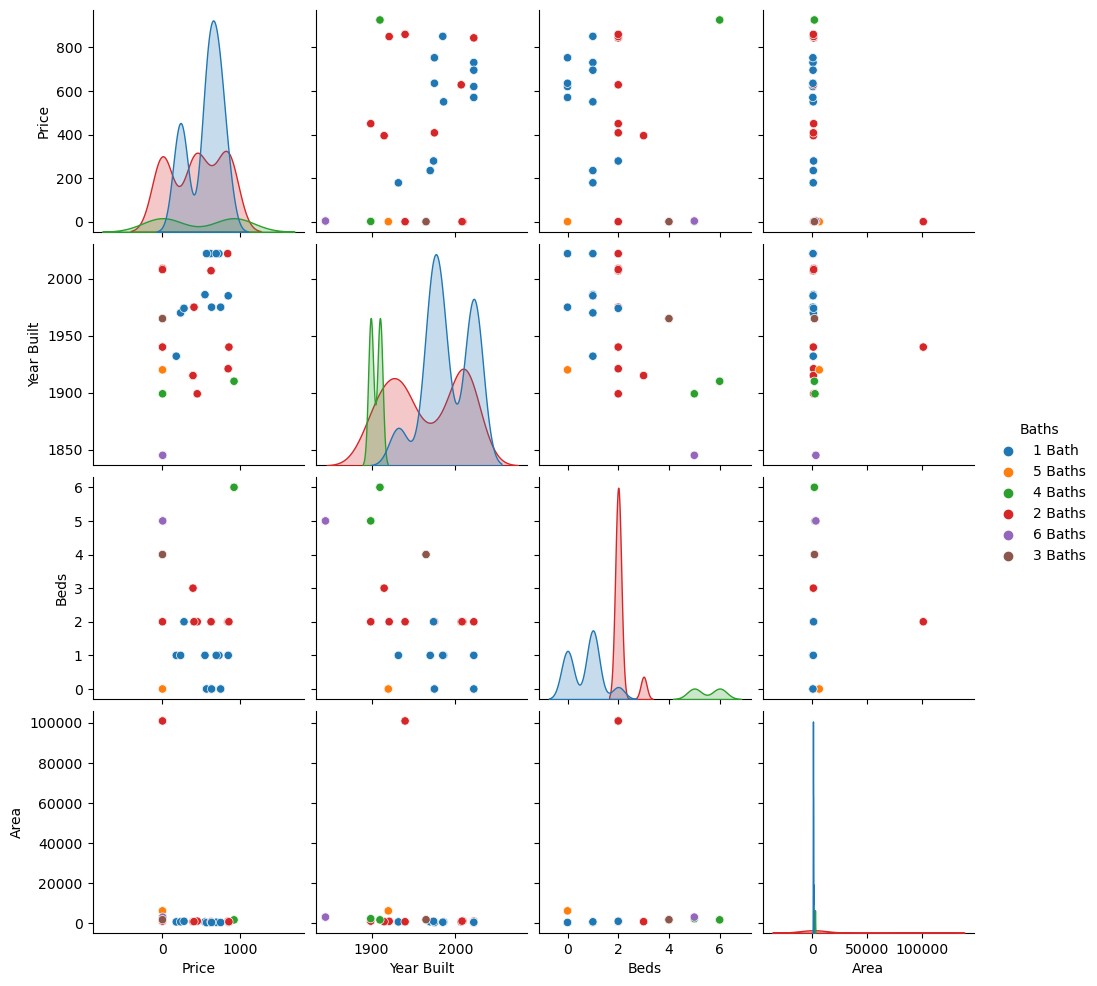

In [102]:
sns.pairplot(data,hue='Baths', size=2.5)


I tried to use a new classifier, Naive Bayes, in hopes to get better predictions/results. The Naive Bayes classifier achieved an accuracy of approximately 81.93% on the test set. This means it correctly predicted the target variable for about 81.93% of the instances. Looking at the confusion matrix, it correctly predicted the majority of instances for each class. For example, in the first row, it correctly predicted all instances (31) of "1 Bath." In the second row, it correctly predicted 20 instances of "2 Baths" but misclassified 15 instances as "1 Bath." We can see the results better visually in the pairplot. We see a grid of scatterplots where each variable is plotted against every other variable. The hue=Baths adds an additional layer of information by coloring the points based on the quantity of baths in a house. This can be useful for visually inspecting relationships between variables and identifying patterns or clusters depending on the quantity of baths a house has. The Naive Bayes classifier seems to be a lot more suitable of a choice for the given classification task compared to SVC. 

Decision Trees Classifier

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image

In [142]:
model = DecisionTreeClassifier(
    random_state=3, 
    criterion='entropy',
    splitter='best', 
    max_depth=3, 
    )

#decison trees are the same game as 20 questions on a dataset
#entropy is a measure of the predictablity in each class 
#max_depth 


model.fit(X_train,y_train)
#fit
y_pred = model.predict(X_test)
#predict
accuracy = model.score(X_test, y_test)
# evaluate predictions

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.95%


In [143]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

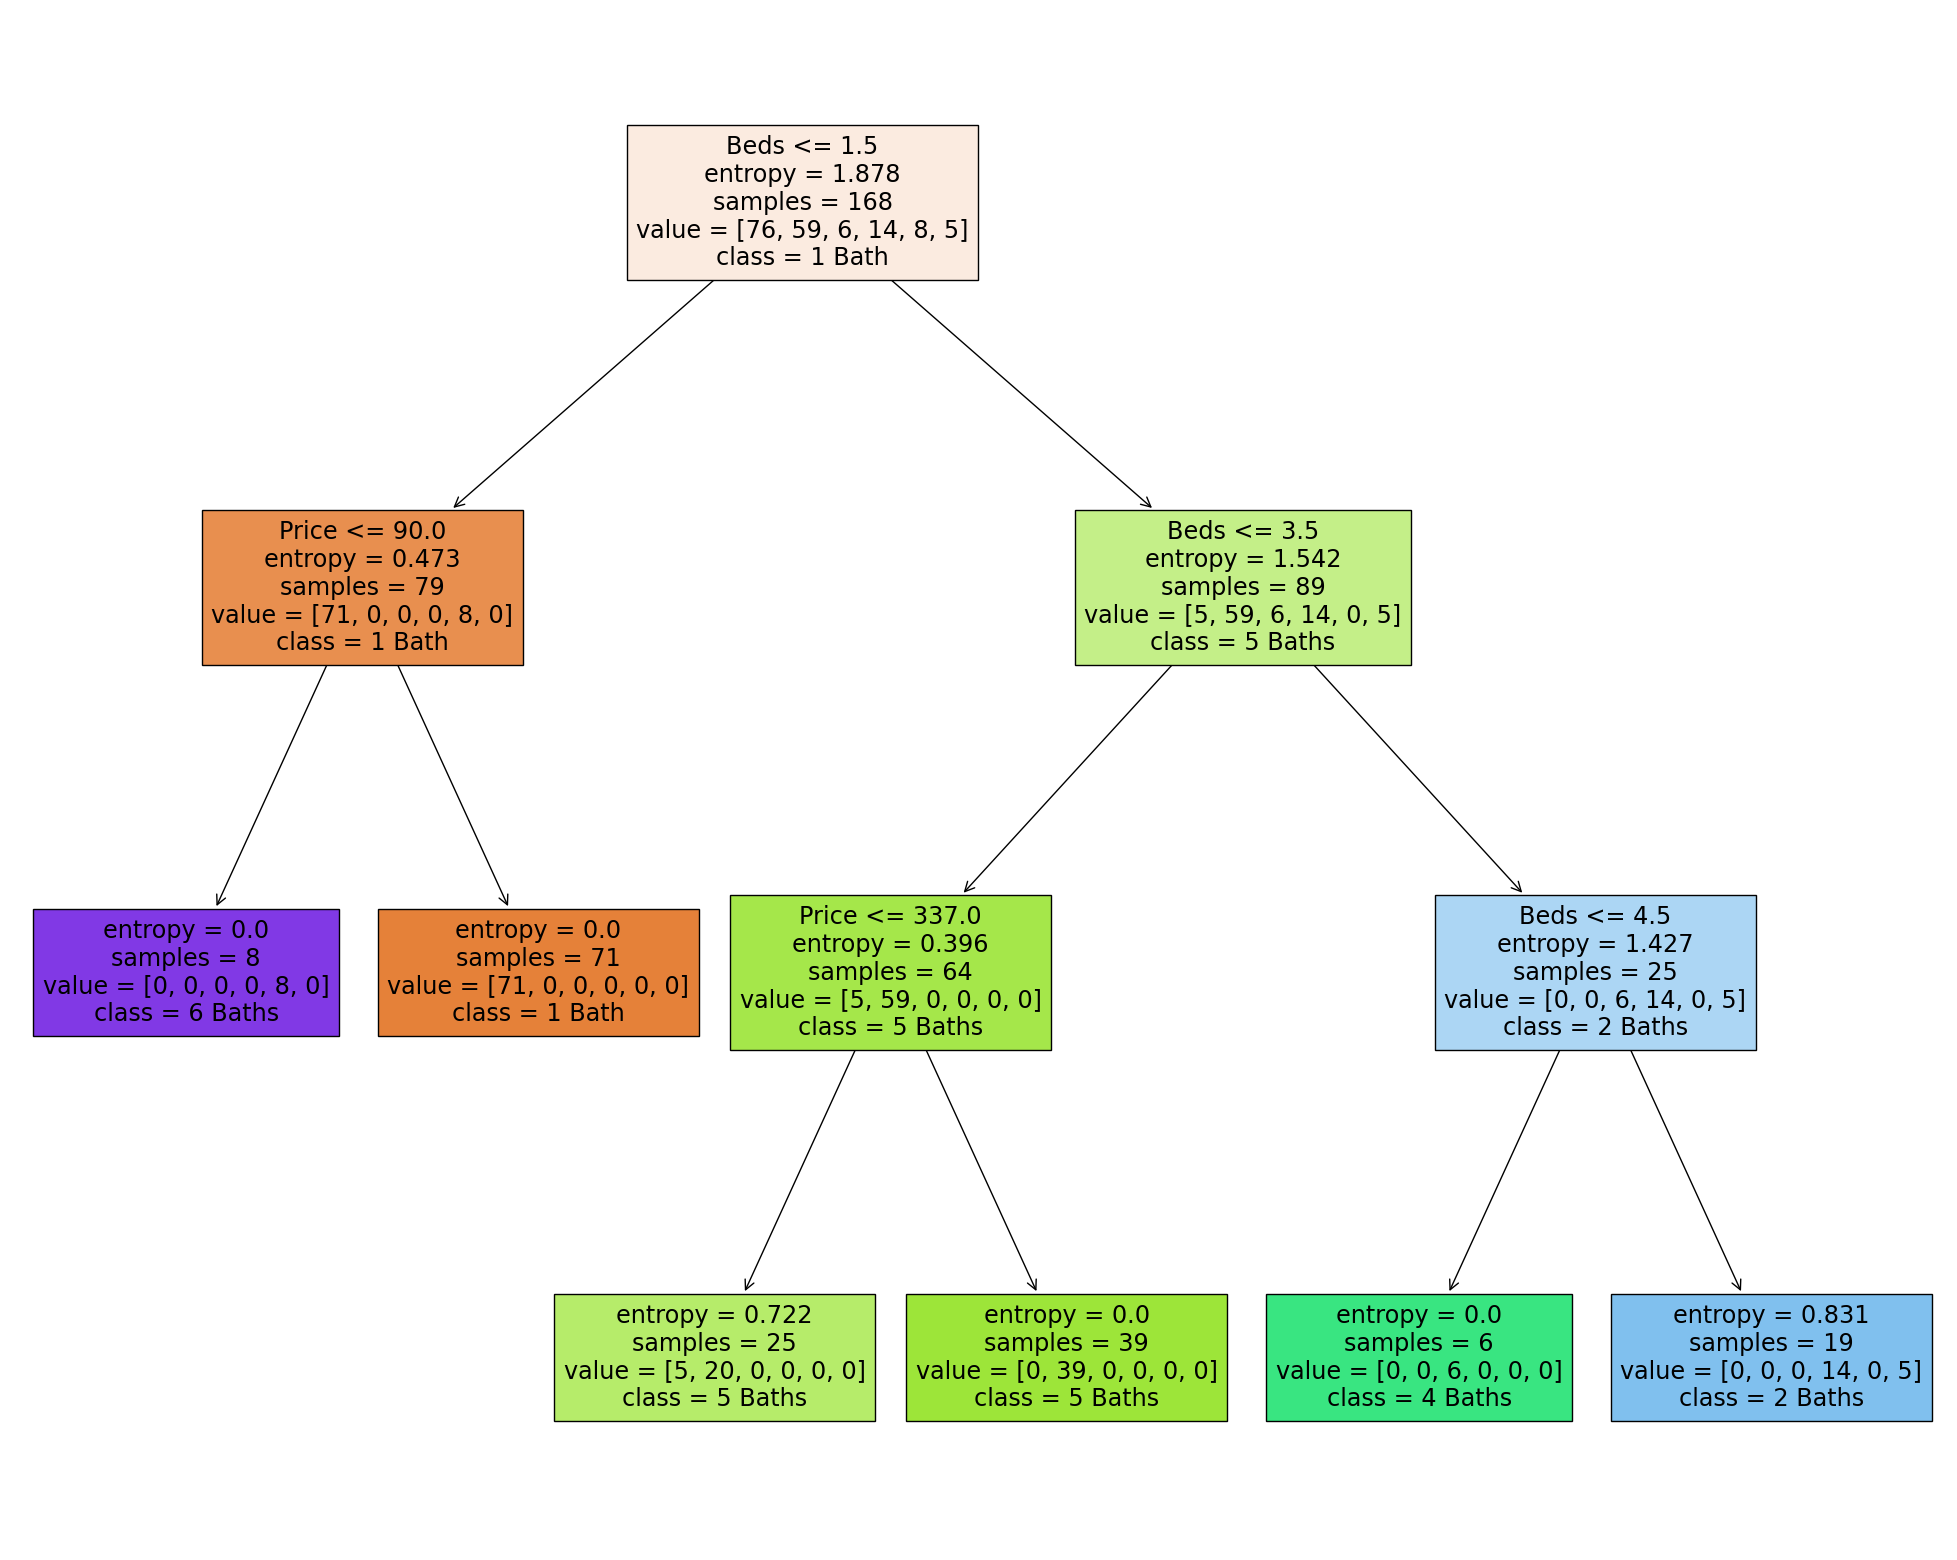

In [144]:
fig = plt.figure(figsize=(25,20))
# we use '_' to capture the return from plot_tree(...) and never do anything with it
_ = plot_tree(model, 
                feature_names=list(X.columns),  # ordered list of features
                class_names=list(y.unique()), # unique() is handy here due to numerical sorting of classes
                filled=True)

The last classifier I decided to use is the decision tree classifier. Based on the accuracy the decision tree model correctly predicted the target variable for approximately 87.95% of instances in the test set. This decision tree achieved an accuracy of 87.95%, and the visualization allows for an interpretation of how the model makes decisions based on the features in the dataset. The first node in the decision tree is a decision based on the feature "beds" with a threshold of 1.5. The entropy at this node is 1.878, and there are 168 samples in this node that meet the condition beds <=1.5 . The class distribution for these samples is given by the "value" parameter, and the class labels are associated with the counts: 76, 59, 6, 14, 8, 5, corresponding to the classes 1, 2, 3, 4, 5, 6 Baths. The next step in this decision tree would be for instances with "beds" less than or equal to 1.5 they go to the left branch, and those with "beds" greater than 1.5 go to the right branch. The decision tree will continue to split the data based on other features and thresholds to further refine the predictions. Each split will create new nodes, each with its own entropy, samples, value, and class information. This process continues recursively until the tree reaches a stopping criterion, such as reaching the maximum depth specified or having nodes with pure classes.

In [103]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y, cv=5, n_jobs=-1)
#taking our original dataset and witholding some of that data and traianing/testing. doing it 5 times and getting the mean accuracy

print("Accuracy: %0.2f%% (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2*100))

Accuracy: 84.85% (+/- 2.10)


The average accuracy of my decision tree model across the different folds of the cross-validation is 84.85%. This represents the central tendency of the model's accuracy. The confidence interval of 84.85% (+/- 2.10) suggests that you I be reasonably confident that the true accuracy of the model falls within the range of 82.75% to 87.95%. 